# Exploratory Data Analysys

In [3]:
import pandas as pd
import numpy as np
import os
import matplotsoccer

In [4]:
# constants

PATH: str = "../data/spadl_format/"

player_ids: dict = {
    "salah": 120353,
    "debruyne": 38021
}

CTY5_0LIV_ID: int = 2499754

In [5]:
df: pd.DataFrame = pd.read_csv(f"{PATH}England.csv", index_col=0)
df.head(10)

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,type_name,result_name,bodypart_name,player_name
0,2499719,1,2.758649,1609,25413,51.45,34.68,32.55,14.96,177959171.0,0,0,1,0,pass,success,foot,A. Lacazette
1,2499719,1,4.946850,1609,370224,32.55,14.96,53.55,17.00,177959172.0,0,0,1,1,pass,success,foot,R. Holding
2,2499719,1,6.542188,1609,3319,53.55,17.00,36.75,19.72,177959173.0,1,0,1,2,pass,success,head,M. Özil
3,2499719,1,8.143395,1609,120339,36.75,19.72,43.05,3.40,177959174.0,1,0,1,3,pass,success,head,Mohamed Elneny
4,2499719,1,10.302366,1609,167145,43.05,3.40,75.60,8.16,177959175.0,0,0,1,4,pass,success,foot,Bellerín
5,2499719,1,12.548934,1609,3319,75.60,8.16,80.85,17.00,177959177.0,0,0,0,5,pass,fail,foot,M. Özil
6,2499719,1,13.961228,1631,8653,24.15,51.00,40.95,57.80,177959186.0,1,0,1,6,pass,success,head,H. Maguire
7,2499719,1,15.320341,1609,167145,70.35,13.60,70.35,13.60,177959178.0,0,10,1,7,interception,success,foot,Bellerín
8,2499719,1,15.320341,1609,167145,70.35,13.60,61.95,26.52,177959178.0,1,0,1,8,pass,success,head,Bellerín
9,2499719,1,18.051875,1609,49876,61.95,26.52,47.25,37.40,177959179.0,1,0,1,9,pass,success,head,G. Xhaka


In [10]:
# actions_df: pd.DataFrame = df[(df["game_id"] == CTY5_0LIV_ID) & (df["type_name"] == "shot") & (df["result_name"] == "success")]
AGUERO_GOAL_ID: int = 360
actions_df: pd.DataFrame = df[(df["game_id"] == CTY5_0LIV_ID) & (df["action_id"].isin(range(AGUERO_GOAL_ID - 4, AGUERO_GOAL_ID + 1)))]

In [64]:
actions_df: pd.DataFrame = df[(df["game_id"] == CTY5_0LIV_ID) & (df["type_name"] == "shot") & (df["result_name"] == "success")]
actions_df

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,type_name,result_name,bodypart_name,player_name
43567,2499754,1,1440.596269,1625,8325,94.50,23.12,105.0,34.0,185703074.0,5,11,1,360,shot,success,foot_right,S. Agüero
43805,2499754,1,3010.214354,1625,340386,99.75,32.64,105.0,34.0,185703420.0,3,11,1,598,shot,success,head/other,Gabriel Jesus
43991,2499754,2,453.319838,1625,340386,96.60,42.84,105.0,34.0,185703640.0,4,11,1,784,shot,success,foot_left,Gabriel Jesus
44395,2499754,2,1871.281100,1625,245364,98.70,42.84,105.0,37.4,185704194.0,4,11,1,1188,shot,success,foot_left,L. Sané
44652,2499754,2,2737.243355,1625,245364,80.85,27.20,105.0,37.4,185704462.0,4,11,1,1445,shot,success,foot_left,L. Sané


In [11]:
actions_df

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,type_name,result_name,bodypart_name,player_name
43563,2499754,1,1432.703113,1612,7964,34.65,43.52,44.1,48.96,185703158.0,1,0,1,356,pass,success,head,J. Henderson
43564,2499754,1,1435.419302,1625,105339,58.80,23.12,60.9,33.32,185703069.0,1,0,1,357,pass,success,head,Fernandinho
43565,2499754,1,1436.829515,1625,38021,60.90,33.32,92.4,31.28,185703070.0,0,0,1,358,pass,success,foot,K. De Bruyne
43566,2499754,1,1438.768856,1625,8325,92.40,31.28,94.5,23.12,185703073.0,0,7,1,359,take_on,success,foot,S. Agüero
43567,2499754,1,1440.596269,1625,8325,94.50,23.12,105.0,34.00,185703074.0,5,11,1,360,shot,success,foot_right,S. Agüero


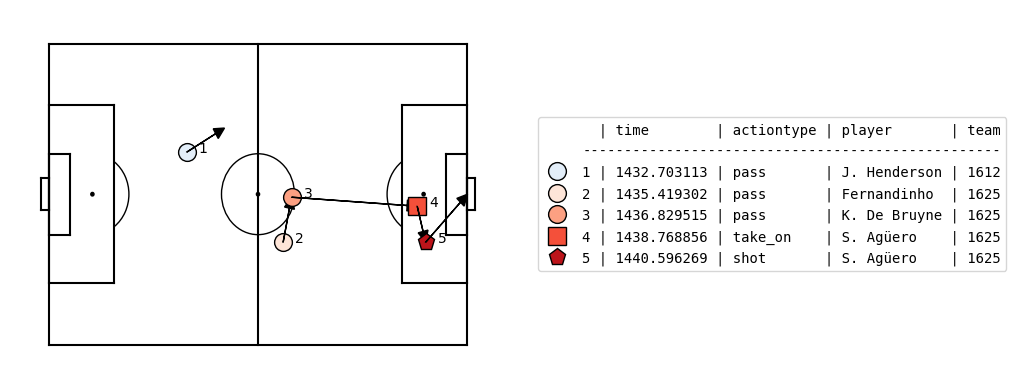

In [12]:
matplotsoccer.actions(
    location=actions_df[["start_x", "start_y", "end_x", "end_y"]],
    action_type=actions_df.type_name,
    team=actions_df.team_id,
    result=actions_df.result_name == "success",
    label=actions_df[["time_seconds", "type_name", "player_name", "team_id"]],
    labeltitle=["time","actiontype","player","team"],
    zoom=False
)